In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
flights_df = pd.read_csv('flights.csv', low_memory=False)
ailines_df = pd.read_csv('airlines.csv', low_memory=False)

In [84]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
ailines_df.head(20)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [86]:
len(flights_df)
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [87]:
flights_df['DATE'] = pd.to_datetime(flights_df[['YEAR', 'MONTH', 'DAY']])
flights_df = flights_df.drop(['YEAR', 'MONTH', 'DAY'], axis=1)


In [88]:
flights_df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [89]:
new_order = ['DATE', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [90]:
flights_df = flights_df[new_order]
flights_df.tail()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015-12-31,4,B6,688,LAX,BOS,2359,2355.0,-4.0,320.0,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015-12-31,4,B6,745,JFK,PSE,2359,2355.0,-4.0,227.0,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015-12-31,4,B6,1503,JFK,SJU,2359,2350.0,-9.0,221.0,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015-12-31,4,B6,333,MCO,SJU,2359,2353.0,-6.0,161.0,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015-12-31,4,B6,839,JFK,BQN,2359,14.0,15.0,221.0,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DATE                 datetime64[ns]
 1   DAY_OF_WEEK          int64         
 2   AIRLINE              object        
 3   FLIGHT_NUMBER        int64         
 4   ORIGIN_AIRPORT       object        
 5   DESTINATION_AIRPORT  object        
 6   SCHEDULED_DEPARTURE  int64         
 7   DEPARTURE_TIME       float64       
 8   DEPARTURE_DELAY      float64       
 9   SCHEDULED_TIME       float64       
 10  ELAPSED_TIME         float64       
 11  DISTANCE             int64         
 12  SCHEDULED_ARRIVAL    int64         
 13  ARRIVAL_TIME         float64       
 14  ARRIVAL_DELAY        float64       
 15  DIVERTED             int64         
 16  CANCELLED            int64         
 17  CANCELLATION_REASON  object        
 18  AIR_SYSTEM_DELAY     float64       
 19  SECURITY_DELAY       

In [92]:
third_quarter = flights_df[(flights_df['DATE'] >= "2015-09-01") & (flights_df['DATE'] <= "2015-12-31")]

In [93]:
length_of_column = len(third_quarter['ORIGIN_AIRPORT'])
length_of_column

1898313

In [94]:
third_quarter['ORIGIN_AIRPORT'].unique().tolist()

['LAS',
 'SFO',
 'LAX',
 'SLC',
 'SEA',
 'PHX',
 'ABQ',
 'ANC',
 'DEN',
 'FAI',
 'BQN',
 'SJU',
 'PBG',
 'PSE',
 'SAT',
 'IAH',
 'MFE',
 'DFW',
 'EWR',
 'BOS',
 'MSP',
 'PDX',
 'GEG',
 'ORD',
 'BIS',
 'GRK',
 'HNL',
 'XNA',
 'COU',
 'BNA',
 'SGF',
 'ONT',
 'LCH',
 'BPT',
 'ICT',
 'RDD',
 'AUS',
 'STL',
 'FAR',
 'GNV',
 'OKC',
 'TUL',
 'LAW',
 'ACT',
 'DCA',
 'MCO',
 'PHL',
 'TPA',
 'ABR',
 'FSD',
 'TUS',
 'SJT',
 'CLT',
 'PIT',
 'BWI',
 'BJI',
 'FSM',
 'CHO',
 'MAF',
 'PIA',
 'MCI',
 'DVL',
 'CLL',
 'SMF',
 'VPS',
 'HRL',
 'BRO',
 'RDU',
 'BOI',
 'BUF',
 'BTR',
 'LWS',
 'DIK',
 'GRB',
 'MKE',
 'SPS',
 'RIC',
 'JAX',
 'HSV',
 'AGS',
 'SAV',
 'GSO',
 'CHS',
 'ALB',
 'RNO',
 'HOU',
 'MDW',
 'MHT',
 'OAK',
 'TYR',
 'ABI',
 'SBA',
 'EUG',
 'JFK',
 'DHN',
 'LFT',
 'SYR',
 'PWM',
 'ESC',
 'LBB',
 'ATL',
 'CMH',
 'FLL',
 'PBI',
 'SHV',
 'MGM',
 'FNT',
 'BHM',
 'CRP',
 'BTV',
 'ROC',
 'LGA',
 'PVD',
 'DTW',
 'IAD',
 'ORF',
 'AEX',
 'CWA',
 'MFR',
 'OMA',
 'MSO',
 'CAE',
 'TLH',
 'DAY',
 'ELP',


In [95]:
for column in third_quarter.columns:
    if column == 'ORIGIN_AIRPORT' and isinstance(third_quarter['ORIGIN_AIRPORT'].dtype, str):
        third_quarter['ORIGIN_AIRPORT'] = pd.to_numeric(third_quarter['ORIGIN_AIRPORT'], errors='coerce')

In [96]:
third_quarter['ORIGIN_AIRPORT'].unique().tolist()

['LAS',
 'SFO',
 'LAX',
 'SLC',
 'SEA',
 'PHX',
 'ABQ',
 'ANC',
 'DEN',
 'FAI',
 'BQN',
 'SJU',
 'PBG',
 'PSE',
 'SAT',
 'IAH',
 'MFE',
 'DFW',
 'EWR',
 'BOS',
 'MSP',
 'PDX',
 'GEG',
 'ORD',
 'BIS',
 'GRK',
 'HNL',
 'XNA',
 'COU',
 'BNA',
 'SGF',
 'ONT',
 'LCH',
 'BPT',
 'ICT',
 'RDD',
 'AUS',
 'STL',
 'FAR',
 'GNV',
 'OKC',
 'TUL',
 'LAW',
 'ACT',
 'DCA',
 'MCO',
 'PHL',
 'TPA',
 'ABR',
 'FSD',
 'TUS',
 'SJT',
 'CLT',
 'PIT',
 'BWI',
 'BJI',
 'FSM',
 'CHO',
 'MAF',
 'PIA',
 'MCI',
 'DVL',
 'CLL',
 'SMF',
 'VPS',
 'HRL',
 'BRO',
 'RDU',
 'BOI',
 'BUF',
 'BTR',
 'LWS',
 'DIK',
 'GRB',
 'MKE',
 'SPS',
 'RIC',
 'JAX',
 'HSV',
 'AGS',
 'SAV',
 'GSO',
 'CHS',
 'ALB',
 'RNO',
 'HOU',
 'MDW',
 'MHT',
 'OAK',
 'TYR',
 'ABI',
 'SBA',
 'EUG',
 'JFK',
 'DHN',
 'LFT',
 'SYR',
 'PWM',
 'ESC',
 'LBB',
 'ATL',
 'CMH',
 'FLL',
 'PBI',
 'SHV',
 'MGM',
 'FNT',
 'BHM',
 'CRP',
 'BTV',
 'ROC',
 'LGA',
 'PVD',
 'DTW',
 'IAD',
 'ORF',
 'AEX',
 'CWA',
 'MFR',
 'OMA',
 'MSO',
 'CAE',
 'TLH',
 'DAY',
 'ELP',


In [97]:
third_quarter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898313 entries, 3920766 to 5819078
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DATE                 datetime64[ns]
 1   DAY_OF_WEEK          int64         
 2   AIRLINE              object        
 3   FLIGHT_NUMBER        int64         
 4   ORIGIN_AIRPORT       object        
 5   DESTINATION_AIRPORT  object        
 6   SCHEDULED_DEPARTURE  int64         
 7   DEPARTURE_TIME       float64       
 8   DEPARTURE_DELAY      float64       
 9   SCHEDULED_TIME       float64       
 10  ELAPSED_TIME         float64       
 11  DISTANCE             int64         
 12  SCHEDULED_ARRIVAL    int64         
 13  ARRIVAL_TIME         float64       
 14  ARRIVAL_DELAY        float64       
 15  DIVERTED             int64         
 16  CANCELLED            int64         
 17  CANCELLATION_REASON  object        
 18  AIR_SYSTEM_DELAY     float64       
 19  SECURITY_DELAY      

In [98]:
third_quarter.loc[third_quarter['DIVERTED'] >= 1]

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3922722,2015-09-01,2,AA,1318,SJC,DFW,710,707.0,-3.0,214.0,...,1749.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3927244,2015-09-01,2,WN,577,MCO,BDL,1135,1526.0,231.0,160.0,...,2039.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3927332,2015-09-01,2,EV,4281,PIT,IAH,1140,1134.0,-6.0,194.0,...,1514.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3929666,2015-09-01,2,OO,5622,ORD,BDL,1400,1357.0,-3.0,131.0,...,2011.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3930139,2015-09-01,2,B6,445,SWF,MCO,1435,1425.0,-10.0,168.0,...,1916.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813860,2015-12-31,4,UA,1291,LIH,LAX,1405,1901.0,296.0,336.0,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5815052,2015-12-31,4,EV,2785,DFW,BRO,1530,1555.0,25.0,110.0,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5816657,2015-12-31,4,UA,291,IAD,SMF,1735,1740.0,5.0,351.0,...,2216.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5817342,2015-12-31,4,MQ,3060,DFW,FAR,1830,1840.0,10.0,163.0,...,2250.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
third_quarter.loc[third_quarter['CANCELLED'] >= 1]

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3920818,2015-09-01,2,B6,768,PSE,MCO,334,NaN,NaN,174.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3921026,2015-09-01,2,WN,121,FLL,ATL,540,NaN,NaN,115.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3921129,2015-09-01,2,OO,5218,IDA,DEN,550,NaN,NaN,95.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3921570,2015-09-01,2,OO,6420,PSP,DEN,605,NaN,NaN,133.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3921665,2015-09-01,2,AS,41,ANC,BET,615,611.0,-4.0,74.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015-12-31,4,UA,1789,IAH,TPA,1955,NaN,NaN,125.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015-12-31,4,UA,222,SFO,LAX,2000,NaN,NaN,96.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015-12-31,4,AA,2245,MIA,SAN,2019,NaN,NaN,337.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015-12-31,4,NK,416,FLL,IAG,2155,NaN,NaN,175.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [100]:
third_quarter.loc[third_quarter['ARRIVAL_DELAY'] >= 1]

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3920766,2015-09-01,2,NK,298,LAS,IAH,3,110.0,67.0,177.0,...,600.0,60.0,0,0,NaN,0.0,0.0,0.0,60.0,0.0
3920767,2015-09-01,2,AA,1965,SFO,CLT,5,2.0,-3.0,303.0,...,809.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920774,2015-09-01,2,AA,448,SLC,CLT,15,52.0,37.0,234.0,...,636.0,27.0,0,0,NaN,0.0,0.0,0.0,27.0,0.0
3920780,2015-09-01,2,AA,771,PHX,PHL,35,42.0,7.0,270.0,...,818.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920798,2015-09-01,2,AA,1051,SFO,DFW,59,127.0,28.0,199.0,...,637.0,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819057,2015-12-31,4,NK,371,FLL,BQN,2358,11.0,13.0,140.0,...,346.0,28.0,0,0,NaN,15.0,0.0,13.0,0.0,0.0
5819069,2015-12-31,4,B6,1248,LAS,JFK,2359,238.0,159.0,282.0,...,1020.0,159.0,0,0,NaN,0.0,0.0,159.0,0.0,0.0
5819071,2015-12-31,4,B6,802,SLC,MCO,2359,15.0,16.0,249.0,...,625.0,17.0,0,0,NaN,1.0,0.0,16.0,0.0,0.0
5819073,2015-12-31,4,B6,66,ABQ,JFK,2359,15.0,16.0,227.0,...,549.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
third_quarter['AIRLINE'].unique().tolist()

['NK', 'AA', 'DL', 'UA', 'VX', 'B6', 'AS', 'HA', 'EV', 'MQ', 'OO', 'F9', 'WN']

In [118]:
affective_columns = [
    'DAY_OF_WEEK', 'AIRLINE', 'DEPARTURE_DELAY', 'DISTANCE', 'ARRIVAL_DELAY',
    'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

reduced_third_quarter = third_quarter[affective_columns]

display(reduced_third_quarter)


,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3920766,2,NK,67.0,1222,60.0,0,0,NaN,0.0,0.0,0.0,60.0,0.0
3920767,2,AA,-3.0,2296,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920768,2,DL,-3.0,1589,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920769,2,NK,4.0,1299,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920770,2,UA,-5.0,1846,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,4,B6,-4.0,2611,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,4,B6,-4.0,1617,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,4,B6,-9.0,1598,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,4,B6,-6.0,1189,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
reduced_third_quarter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898313 entries, 3920766 to 5819078
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DAY_OF_WEEK          int64  
 1   AIRLINE              object 
 2   DEPARTURE_DELAY      float64
 3   DISTANCE             int64  
 4   ARRIVAL_DELAY        float64
 5   DIVERTED             int64  
 6   CANCELLED            int64  
 7   CANCELLATION_REASON  object 
 8   AIR_SYSTEM_DELAY     float64
 9   SECURITY_DELAY       float64
 10  AIRLINE_DELAY        float64
 11  LATE_AIRCRAFT_DELAY  float64
 12  WEATHER_DELAY        float64
dtypes: float64(7), int64(4), object(2)
memory usage: 202.8+ MB


In [121]:
grouped_data = reduced_third_quarter.groupby(['AIRLINE', 'DAY_OF_WEEK']).agg({
    'DEPARTURE_DELAY': lambda x: (x > 0).sum(),  
    'ARRIVAL_DELAY': lambda x: (x > 0).sum(), 
    'CANCELLED': 'sum'  
}).reset_index()

grouped_data = grouped_data.rename(columns={
    'DEPARTURE_DELAY': 'DEPARTURE_DELAYS_COUNT',
    'ARRIVAL_DELAY': 'ARRIVAL_DELAYS_COUNT',
    'CANCELLED': 'CANCELLATION_COUNT'
})

display(grouped_data)

,AIRLINE,DAY_OF_WEEK,DEPARTURE_DELAYS_COUNT,ARRIVAL_DELAYS_COUNT,CANCELLATION_COUNT
0,AA,1,13316,13552,546
1,AA,2,11936,12772,294
2,AA,3,13319,14779,202
3,AA,4,14551,15832,324
4,AA,5,14133,15410,566
...,...,...,...,...,...
86,WN,3,26525,22285,463
87,WN,4,26794,21991,296
88,WN,5,25198,20831,237
89,WN,6,18172,14223,521


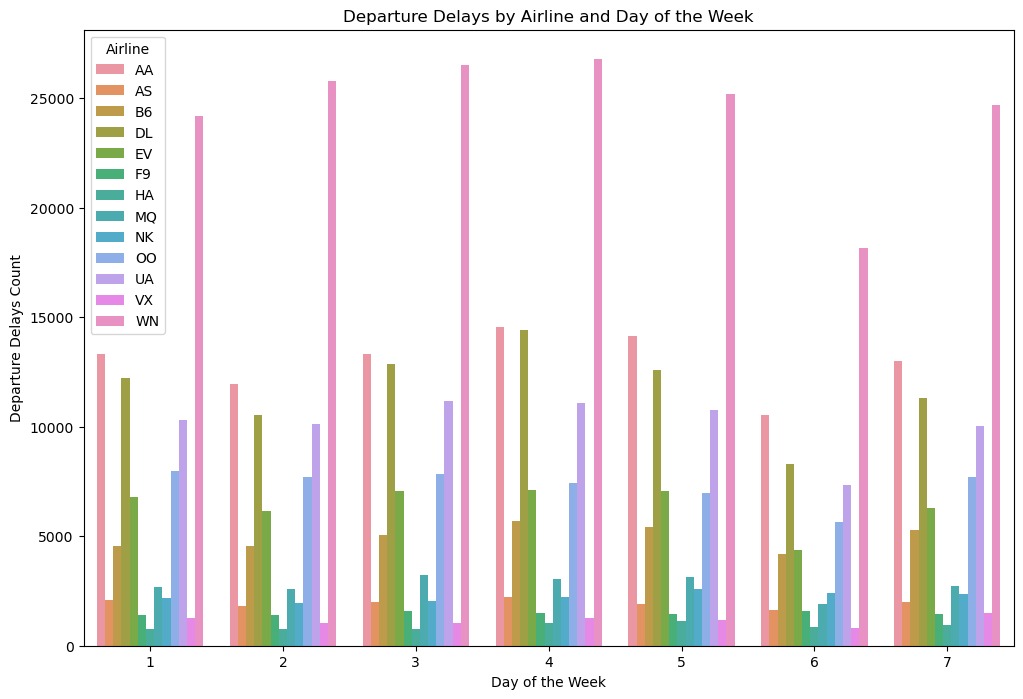

In [124]:
plt.figure(figsize=(12, 8))
sns.barplot(x='DAY_OF_WEEK', y='DEPARTURE_DELAYS_COUNT', hue='AIRLINE', data=grouped_data)
plt.title('Departure Delays by Airline and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Departure Delays Count')
plt.legend(title='Airline')
plt.show()

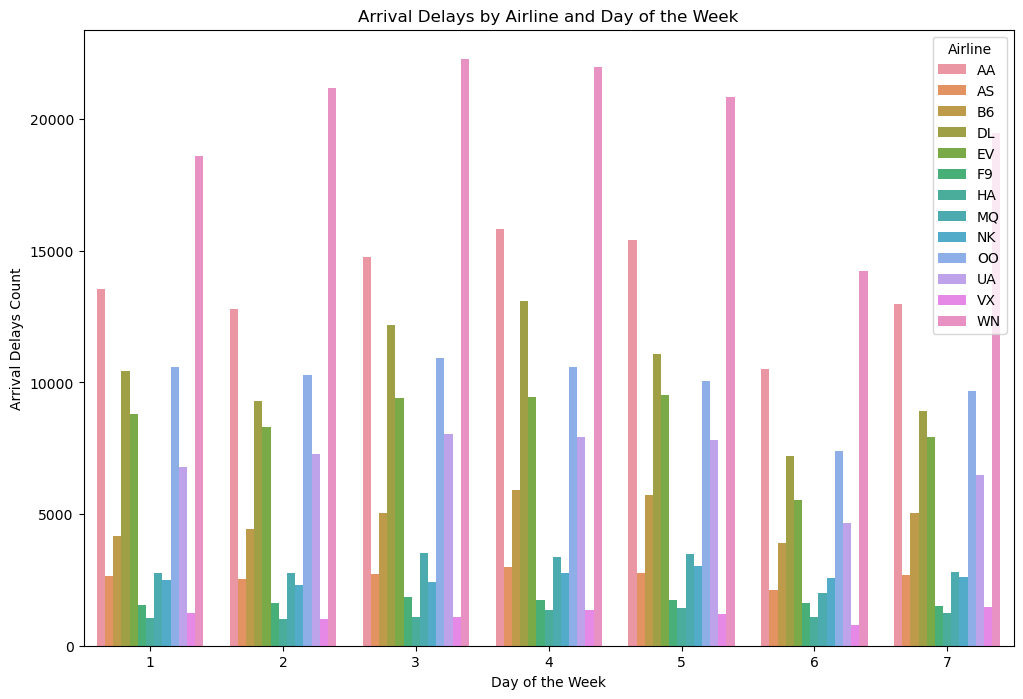

In [125]:
plt.figure(figsize=(12, 8))
sns.barplot(x='DAY_OF_WEEK', y='ARRIVAL_DELAYS_COUNT', hue='AIRLINE', data=grouped_data)
plt.title('Arrival Delays by Airline and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Arrival Delays Count')
plt.legend(title='Airline')
plt.show()

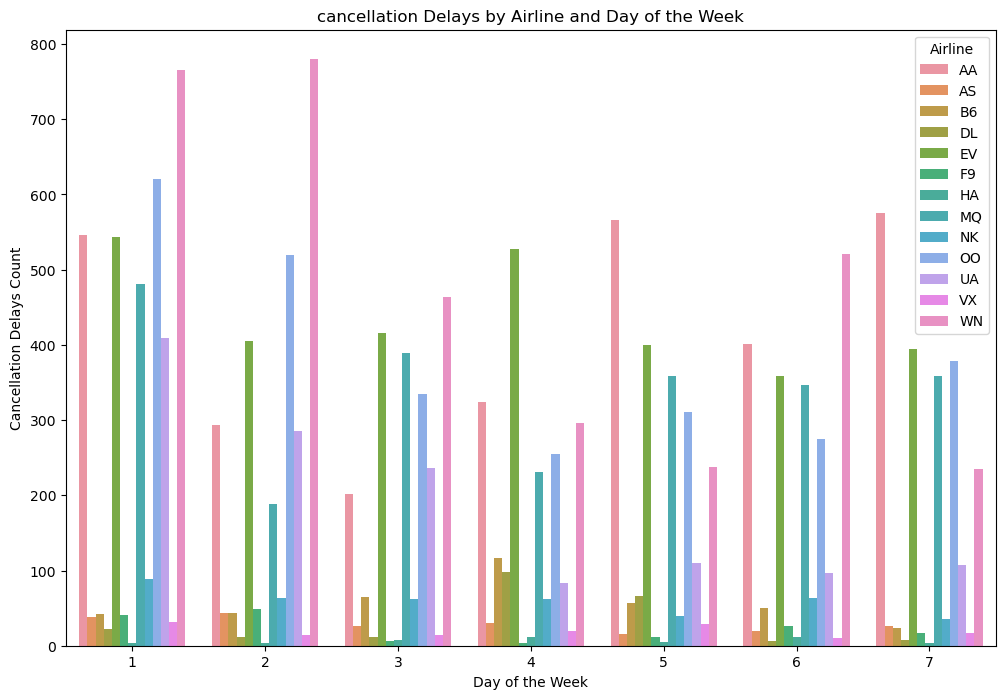

In [126]:
plt.figure(figsize=(12, 8))
sns.barplot(x='DAY_OF_WEEK', y='CANCELLATION_COUNT', hue='AIRLINE', data=grouped_data)
plt.title('cancellation Delays by Airline and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Delays Count')
plt.legend(title='Airline')
plt.show()

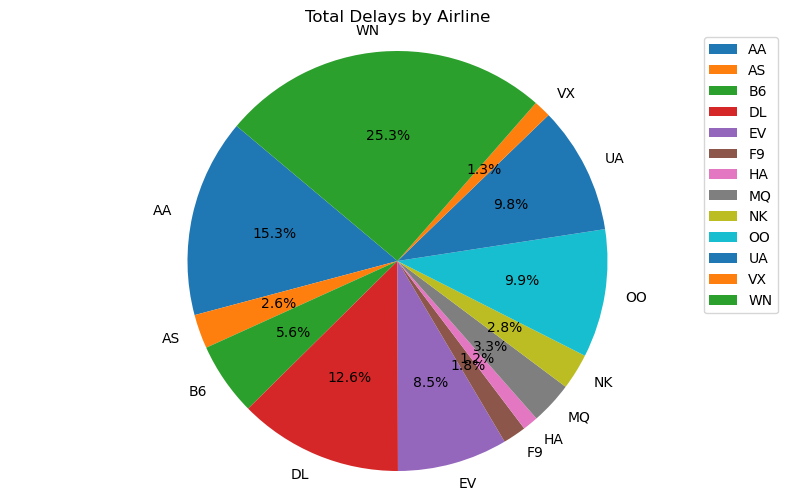

In [135]:
total_delays = grouped_data.groupby('AIRLINE').agg({
    'DEPARTURE_DELAYS_COUNT': 'sum',
    'ARRIVAL_DELAYS_COUNT': 'sum',
    'CANCELLATION_COUNT': 'sum'
})

total_delays['TOTAL_DELAYS'] = total_delays['DEPARTURE_DELAYS_COUNT'] + total_delays['ARRIVAL_DELAYS_COUNT']
total_delays = total_delays.drop(['DEPARTURE_DELAYS_COUNT', 'ARRIVAL_DELAYS_COUNT'], axis=1)

plt.figure(figsize=(10, 6))
plt.pie(total_delays['TOTAL_DELAYS'], labels=total_delays.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Delays by Airline')
plt.axis('equal') 
plt.legend(total_delays.index, loc='best')
plt.show()